***
# **<font color=darkblue size=10>Data Science Project</font>**
***

## **Descriptive Analysis of a Dataset**

Using the knowledge acquired during the data science classes, we will perform a basic descriptive analysis of a dataset of international matches during the years 1876 to 2022. 

We will build graphs, calculate and evaluate measures of central tendency, separator measures and data dispersion.

# **Dependencies**

The pandas, numpy, seaborn and matplotlib libraries were used for data analysis.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Deafult Settings

Some general settings used on the notebook

In [3]:
# Set aspects of the visual theme for all matplotlib and seaborn plots.
sns.set()

In [4]:
%%html
<style>
table {float:left}
</style>

# **<font color=darkblue>PROJECT DATASET</font>**
***

### **International football results from 1872 to 2022**

This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

### Variables used

#### results.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|home_score|full-time home team score including extra time, not including penalty-shootouts|
|away_score|full-time away team score including extra time, not including penalty-shootouts|
|tournament|the name of the tournament|
|city|the name of the city/town/administrative unit where the match was played|
|country|the name of the country where the match was played|
|neutral|TRUE/FALSE column indicating whether the match was played at a neutral venue|

#### shootouts.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|winner|winner of the penalty-shootout|

#### goalscorers.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|team|name of the team scoring the goal|
|scorer|name of the player scoring the goal|
|own_goal|whether the goal was an own-goal|
|penalty|whether the goal was a penalty|

### Variables created bellow

#### results.csv

|Variable|Description|
|:---|:---|
|goal_dif|difference between home_score and away_score|
|year|year of the game|

#### goalscorers.csv

|Variable|Description|
|:---|:---|
|year|year of the match|

# **Loading Dataset Files**

This dataset is made up of three csv files and their descriptions are provided below.

* goalscorers: goals scored and details about them
* shootouts: resultsof penalty shootouts
* results: results of international matches.

In [8]:
goalscorers = pd.read_csv('data/goalscorers.csv')
shootouts = pd.read_csv('data/shootouts.csv')
results = pd.read_csv('data/results.csv')

# Process Datasets

## results.csv

In [9]:
# Create a goal_dif column
results['goal_dif'] = results['home_score'] - results['away_score']
# Change type of date column to datetime
results['date'] = pd.to_datetime(results.date)
# Add column year
results['year'] = results.date.map(lambda x: x.year)
results.head(15)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_dif,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,4,1876
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,-2,1877
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,-2,1877
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,5,1878
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,9,1878


## shootouts.csv

## goalscores.csv

In [10]:
# Change type of date column to datetime
goalscorers['date'] = pd.to_datetime(goalscorers.date)
# Add column year
goalscorers['year'] = goalscorers.date.map(lambda x: x.year)
goalscorers.head(5)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916


# Descriptive Variables Analysis

## **results dataset**

### **Measures of Central Tendency**

#### **Mean**

In [11]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].mean().to_frame().T

,year,home_score,away_score,goal_dif,neutral
0,1992.095787,1.739278,1.178401,0.560877,0.248603


#### **Median**

In [12]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].median().to_frame().T

,year,home_score,away_score,goal_dif,neutral
0,1999.0,1.0,1.0,0.0,0.0


#### **Mode**

In [13]:
cols = ['year', 'home_team', 'away_team', 'home_score', 'away_score', 'goal_dif', 'tournament', 'city', 'country', 'neutral']
results[cols].mode()

,year,home_team,away_team,home_score,away_score,goal_dif,tournament,city,country,neutral
0,2019,Brazil,Uruguay,1,0,0,Friendly,Kuala Lumpur,United States,False


### **Dispersion Measures**

#### **Standard Deviation**

In [15]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].std().to_frame().T

,year,home_score,away_score,goal_dif,neutral
0,24.62302,1.747263,1.393775,2.381203,0.432208


#### **Variance**

In [16]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].var().to_frame().T

,year,home_score,away_score,goal_dif,neutral
0,606.293096,3.052926,1.942609,5.670126,0.186804


### **Boxplots**

**Observação:** Nos gráficos que analisam as variáves `home_score`, `away_score` e `goal_dif`, os valores cujo módulo fosse acima de 8 foram simplificados para facilitar a comparação

#### **year**

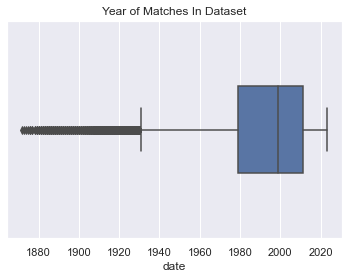

In [21]:
# Visualization Settings
ax = sns.boxplot(data=results, x=results.date.map(lambda x: x.year), width=0.4, orient='h')
ax.set_title("Year of Matches In Dataset")


# Show
plt.show()

#### **home_score and away_score**

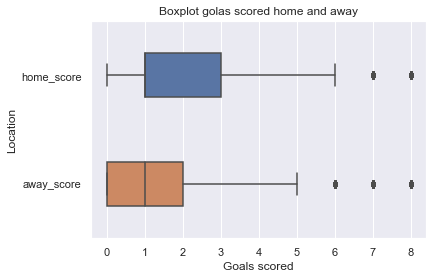

In [22]:
# Create copy of results DataFrame
match_score = results[['home_score', 'away_score', 'neutral']].copy()

# Remove matches in neutral field for comparation
mask_field = match_score.neutral == False

# Simplifying the number of goals above 8 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_home = match_score.home_score > max_number_of_goals
mask_number_of_goals_away = match_score.away_score > max_number_of_goals

match_score.home_score = match_score.home_score.where(~mask_number_of_goals_home, max_number_of_goals)
match_score.away_score = match_score.away_score.where(~mask_number_of_goals_away, max_number_of_goals)

# Visualização
ax = sns.boxplot(data=match_score[['home_score', 'away_score']][mask_field],
            width=0.4, orient='h')
ax.set_ylabel("Location")
ax.set_xlabel("Goals scored")
ax.set_title("Boxplot golas scored home and away")

# Show
plt.show()

#### **goal_dif**

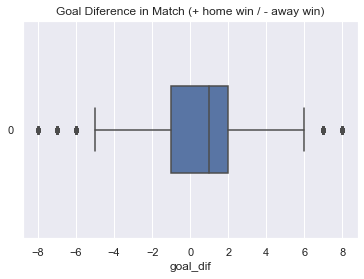

In [23]:
# Create copy of results DataFrame
match_score = results[['goal_dif', 'neutral']].copy()

# Remove matches in neutral field for comparation
mask_field = match_score.neutral == False

# Simplifying the number of goals above 7 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_dif_home = match_score.goal_dif > max_number_of_goals
mask_number_of_goals_dif_away = match_score.goal_dif < -max_number_of_goals

match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_home, max_number_of_goals)
match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_away, max_number_of_goals)

# Visualização
ax = sns.boxplot(data=match_score['goal_dif'][mask_field],
            width=0.4, orient='h')
ax.set_xlabel("goal_dif")
ax.set_title("Goal Diference in Match (+ home win / - away win)")

# Show
plt.show()

## **goalscores dataset**

### **Measures of Central Tendency**

#### **Mean**

In [24]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].mean().to_frame().T

,minute,own_goal,penalty
0,50.019166,0.017509,0.065475


#### **Median**

In [25]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].median().to_frame().T

,minute,own_goal,penalty
0,51.0,0.0,0.0


#### **Mode**

In [26]:
cols = ['home_team', 'away_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty']
goalscorers[cols].mode()

,home_team,away_team,team,scorer,minute,own_goal,penalty
0,Brazil,Uruguay,Brazil,Cristiano Ronaldo,90.0,False,False


### **Dispersion Measures**

#### **Standard Deviation**

In [27]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].std().to_frame().T

,minute,own_goal,penalty
0,26.360859,0.131159,0.247365


#### **Variance**

In [28]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].var().to_frame().T

,minute,own_goal,penalty
0,694.894894,0.017203,0.06119


### **Boxplots**

#### **minute**

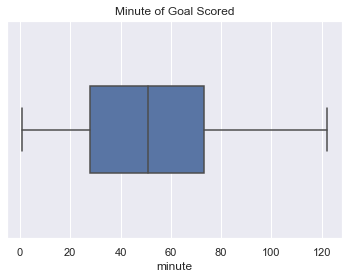

In [29]:
# Visualização
ax = sns.boxplot(data=goalscorers, x='minute', width=0.4, orient='h')
ax.set_title("Minute of Goal Scored")


# Show
plt.show()

## **shootouts dataset**

### **Measures of Central Tendency**

#### **Mean**

As this dataframe does not have numerical values, it isn't possible to calculate the average.

#### **Median**

As this dataframe does not have numerical values, it isn't possible to calculate the median.

#### **Mode**

In [30]:
shootouts[['home_team', 'away_team', 'winner']].mode()

,home_team,away_team,winner
0,South Africa,Uganda,Argentina
1,Zambia,NaN,NaN


### **Dispersion Measures**

#### **Standard Deviation**

As this dataframe does not have numerical values, it isn't possible to calculate the standard deviation.

#### **Variance**

As this dataframe does not have numerical values, it isn't possible to calculate the variance.

### **Boxplots**

#### **winner_count**

Verifica a frequência absoluta das vitórias em disputas de pênaltis por time

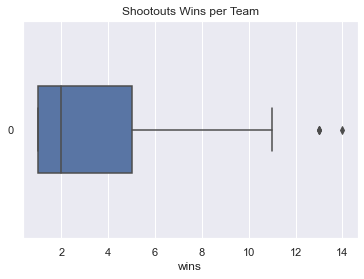

In [31]:
# Visualization
ax = sns.boxplot(data=shootouts.winner.value_counts(), width=0.4, orient='h')
ax.set_title("Shootouts Wins per Team")
ax.set_xlabel('wins')

# Show
plt.show()

# **Bonus - Elo Ranking**

**Observation:** Not optimized.

The World Football Elo Ratings are based on the Elo rating system. This system is used by FIDE, the international chess federation, to rate chess players.

We can apply the Elo rating system to international football, by adding a weighting for the kind of match, an adjustment for the home team advantage, and an adjustment for goal difference in the match result.

The ratings are based on the following formulas:

Rn = Ro + K × (W - We)

- Rn is the new rating, Ro is the old (pre-match) rating.
- K is the weight constant for the tournament played (We made an adjustmant from the reference):
    - 60 for World Cup Matches;
    - 50 for continental championships and major intercontinental tournaments;
    - 40 for World Cup qualifiers and major tournaments;
    - 30 for Continental qualifiers and major tournaments;
    - 20 for Friendly and other tournaments
- W is the result of the game (1 for a win, 0.5 for a draw, and 0 for a loss).
- We is the expected result (win expectancy), either from the chart or the following formula:
    - We = 1 / (10**(-dr/400) + 1)
    - dr equals the difference in ratings plus 100 points for a team playing at home.
    
Reference: https://www.eloratings.net/about

## **Functions implementation**

In [32]:
def expected_result(ranking_a, ranking_b, home_advantage):
    return 1 / (10**(-((ranking_a+home_advantage)-ranking_b)/400) + 1)

# Calculated by goal difference
def result(goal_dif):
    # return 0 to lost
    if goal_dif < 0:
        return 0
    # return 0.5 to draw
    elif goal_dif == 0:
        return 0.5
    # return 1 to win
    return 1


# The number of goals is taken into account by use of a goal difference index
def goal_index(goal_dif):
    goal_dif = abs(goal_dif)
    if goal_dif <= 1:
        return 1
    elif goal_dif == 2:
        return 3/2
    else:
        return (11 + goal_dif) / 8


def tournament_weight(tournament):
    # 60 points
    world_cup = 'FIFA World Cup'
    # 50 points
    continental = ['AFC Asian Cup', 'Africa Cup of Nations',
                  'CONCACAF Gold Cup', 'Copa América', 'OFC Nations Cup',
                  'UEFA European Championship', 'CONCACAF Cup', 'AFC Solidarity Cup',
                  'AFC Challenge Cup', 'Confederations Cup', 'CONMEBOL–UEFA Cup of Champions']
    # 40 points
    international_qualifiers_and_majors = ['UEFA Nations League', 'FIFA World Cup qualification',  
                                           'CONCACAF Nations League', 'African Nations Championship']
    # 30 points
    continental_qualifiers = ['UEFA Euro qualification', 'African Cup of Nations qualification', 'AFC Asian Cup qualification',
                              'Copa América qualification']
    # 20 points + others
    friendly = 'Friendly'
    
    if tournament == world_cup:
        return 60
    elif tournament in continental:
        return 50
    elif tournament in international_qualifiers_and_majors:
        return 40
    elif tournament in continental_qualifiers:
        return 30
    elif tournament == friendly:
        return 20
    else:
        return 20

def points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100):
    g = goal_index(goal_dif)
    k = tournament_weight(tournament)
    w = result(goal_dif)
    we = expected_result(ranking_a, ranking_b, home_advantage)
    return g * k * (w - we)


# Return a tuple with ranking A and ranking B
def elo(ranking_a, ranking_b, goal_dif, tournament, neutral, home=True):
    if neutral and home:
        return ranking_a + points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=0)
    elif neutral and not home:
        return ranking_b - points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=0)
    elif home:
        return ranking_a + points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100)
    return ranking_b - points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100)

## **Data Processing**

In [34]:
# Generate score for elo ranking
def elo_score(df_results, df_countries):
    # Check country
    mask_home = line['home_team'] == countries_ranking['country']
    mask_away = line['away_team'] == countries_ranking['country']
    # calculate new scores
    countries_ranking[mask_home]['score'], countries_ranking[mask_away]['score'] = elo(countries_ranking[mask_home]['score'],
                                                                                      countries_ranking[mask_away]['score'],
                                                                                      line['goal_dif'])
    # return new scores
    return countries_ranking[mask_home]['score'], countries_ranking[mask_away]['score']


# Get all unique countries
countries = np.unique(pd.concat([results.home_team, results.away_team], ignore_index=True))
# Create a DataFrame with initial score
countries_ranking = pd.DataFrame(data=countries, columns=['country'])
countries_ranking['score'] = 1500



# Test ranking
for index, row in results.iterrows():
    if row.home_team in np.array(countries_ranking.country) and row.away_team in np.array(countries_ranking.country):
        mask_home = row['home_team'] == countries_ranking['country']
        mask_away = row['away_team'] == countries_ranking['country']
        countries_ranking.score = countries_ranking.score.where(~mask_home, elo(countries_ranking[mask_home]['score'].iloc[0],
                                                                                  countries_ranking[mask_away]['score'].iloc[0],
                                                                                  row['goal_dif'], row.tournament, row.neutral, home=True))
        countries_ranking.score = countries_ranking.score.where(~mask_away, elo(countries_ranking[mask_home]['score'].iloc[0],
                                                                                  countries_ranking[mask_away]['score'].iloc[0],
                                                                                  row['goal_dif'], row.tournament, row.neutral, home=False))

countries_ranking

,country,score
0,Abkhazia,1590.416934
1,Afghanistan,1292.290165
2,Albania,1568.422788
3,Alderney,1340.406325
4,Algeria,1810.859116
...,...,...
311,Yugoslavia,1817.907847
312,Zambia,1571.641021
313,Zanzibar,1484.132374
314,Zimbabwe,1480.573448


## **All-time Top 15**

In [36]:
countries_ranking.sort_values(by='score', ascending=False).head(15)

,country,score
12,Argentina,2186.924318
38,Brazil,2169.166898
96,France,2150.595142
187,Netherlands,2101.447424
216,Portugal,2055.183608
85,England,2029.930334
28,Belgium,2018.915076
259,Spain,2018.495179
69,Croatia,2004.834604
104,Germany,1989.726241


## **All-time Worst 15**

In [37]:
countries_ranking.sort_values(by='score', ascending=False).tail(15)

,country,score
205,Pakistan,1081.964971
253,Somalia,1075.431554
78,Djibouti,1049.315494
113,Guam,1044.213977
155,Liechtenstein,1026.694729
149,Laos,1022.173833
158,Macau,1015.089436
292,United States Virgin Islands,1011.592970
39,British Virgin Islands,1003.389976
41,Brunei,992.803898


## Boxplot Visualization

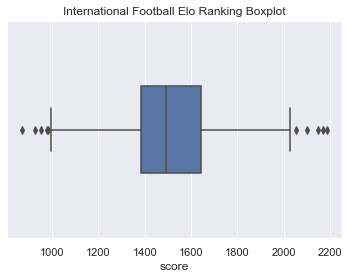

In [38]:
# Visualization
ax = sns.boxplot(data=countries_ranking, x='score', width=0.4, orient='h')
ax.set_title("International Football Elo Ranking Boxplot")
ax.set_xlabel('score')

# Show
plt.show()